#  Read a Trained Mnist Model and Use It
This is a simple version of the Tensorflow Mnist deep neural net code.  it assumes the model has been
trained and stored in the file /tmp/model.ckpt.   It also assumes that MNIST test images and labels have
been stored in /home/thisuser/mnist_test_images.p and /home/this/mnist_test_labels.p
## Copyright
because this is derived from the Google code i should inlcude their copyright

In [1]:
# Copyright 2015 Google Inc. All Rights Reserved. 
# 
# Licensed under the Apache License, Version 2.0 (the "License"); 
# you may not use this file except in compliance with the License. 
# You may obtain a copy of the License at 
# 
#     http://www.apache.org/licenses/LICENSE-2.0 
# 
# Unless required by applicable law or agreed to in writing, software 
# distributed under the License is distributed on an "AS IS" BASIS, 
# WITHOUT WARRANTIES OR CONDITIONS OF ANY KIND, either express or implied. 
# See the License for the specific language governing permissions and 
# limitations under the License. 
# ============================================================================== 


In [2]:
import tensorflow as tf

from __future__ import absolute_import
from __future__ import division
from __future__ import print_function
import gzip
import os
import numpy

In [3]:
import PIL.Image
from cStringIO import StringIO
from IPython.display import clear_output, Image, display
import scipy.ndimage as nd
import numpy as np

In [4]:
def DisplayArray(a, fmt='jpeg', rng=[0,1]):
  """Display an array as a picture."""
  a = (a - rng[0])/float(rng[1] - rng[0])*255
  a = np.uint8(np.clip(a, 0, 255))
  f = StringIO()
  PIL.Image.fromarray(a).save(f, fmt)
  display(Image(data=f.getvalue()))

In [5]:
def showpict(im):
    img = im
    img.shape = (28,28)
    DisplayArray(img)
    

In [6]:
def weight_variable(shape, names):
  initial = tf.truncated_normal(shape, stddev=0.1)
  return tf.Variable(initial, name=names)

def bias_variable(shape, names):
  initial = tf.constant(0.1, shape=shape)
  return tf.Variable(initial, name=names)

In [7]:
x = tf.placeholder(tf.float32, [None, 784], name="x")
y_ = tf.placeholder(tf.float32, [None, 10], name="y_")
#keep_prob = tf.placeholder("float", name="keep_prob")

In [8]:
sess = tf.InteractiveSession()

In [9]:
W_conv1 = weight_variable([5, 5, 1, 32], "wconv")
b_conv1 = bias_variable([32], "bconv")
W_conv2 = weight_variable([5, 5, 32, 64], "wconv2")
b_conv2 = bias_variable([64], "bconv2")
W_fc1 = weight_variable([7 * 7 * 64, 1024], "wfc1")
b_fc1 = bias_variable([1024], "bfcl")
W_fc2 = weight_variable([1024, 10], "wfc2")
b_fc2 = bias_variable([10], "bfc2")

In [10]:
saver = tf.train.Saver()

In [11]:
init =tf.initialize_all_variables()
sess.run(init)

make sure to change the path below to the one you use with the generator.

In [12]:
saver.restore(sess, "/tmp/model.ckpt")

In [13]:
def conv2d(x, W):
  return tf.nn.conv2d(x, W, strides=[1, 1, 1, 1], padding='SAME')

def max_pool_2x2(x):
  return tf.nn.max_pool(x, ksize=[1, 2, 2, 1],
                        strides=[1, 2, 2, 1], padding='SAME')

In [14]:
#first convolutional layer
x_image = tf.reshape(x, [-1,28,28,1])
h_conv1 = tf.nn.relu(conv2d(x_image, W_conv1) + b_conv1)
h_pool1 = max_pool_2x2(h_conv1)
#second convolutional layer
h_conv2 = tf.nn.relu(conv2d(h_pool1, W_conv2) + b_conv2)
h_pool2 = max_pool_2x2(h_conv2)
#final layer
h_pool2_flat = tf.reshape(h_pool2, [-1, 7*7*64])
h_fc1 = tf.nn.relu(tf.matmul(h_pool2_flat, W_fc1) + b_fc1)
y_conv=tf.nn.softmax(tf.matmul(h_fc1, W_fc2) + b_fc2)

make sure to change the path below to the one you used in the trainer.

In [15]:
import pickle
images = pickle.load(open("/home/yourhome/mnist_test_images.p", "rb"))
labels = pickle.load(open("/home/yourhome/mnist_test_labels.p", "rb"))

In [16]:
nocare = numpy.zeros((1,10))


In [17]:
#now let's pick an image at random and reshape it
tim = images[105]
showpict(images[[105]])
tim.shape = ((1,28*28))

##  now let's make sure we can evaluate it correctly.


In [20]:
tim.shape = ((1,28*28))
y = y_conv.eval(feed_dict={x: tim})
label = np.argmax(y)
print(label)

9


##  now eval h_pool2 so that we can see what these 7x7 images look like

In [21]:
pool2 = h_pool2.eval(feed_dict={x: tim})

In [22]:
pool2.shape

(1, 7, 7, 64)

In [23]:
p = pool2[0]
p.shape

(7, 7, 64)

In [26]:
def magnify(a, n, r):
    t = np.zeros((r*n,r*n))
    for i in range(n):
        for j in range(n):
            for k in range(r):
                for l in range(r):
                    t[r*i+k][r*j+l]= a[i][j]
    return t

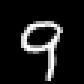

In [27]:
im = images[105]
im.shape = (28,28)
DisplayArray(magnify(im,28,3))

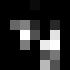

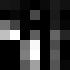

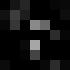

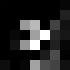

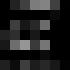

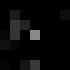

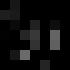

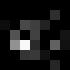

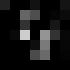

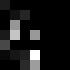

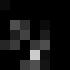

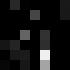

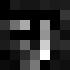

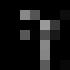

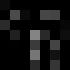

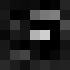

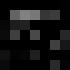

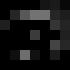

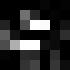

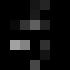

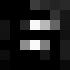

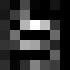

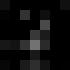

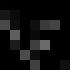

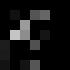

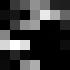

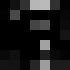

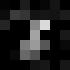

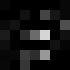

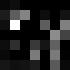

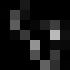

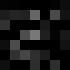

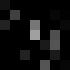

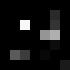

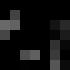

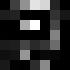

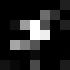

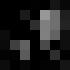

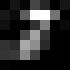

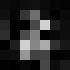

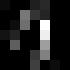

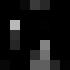

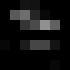

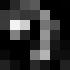

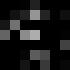

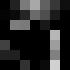

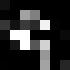

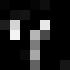

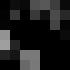

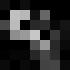

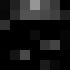

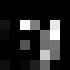

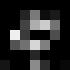

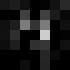

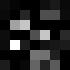

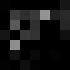

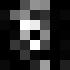

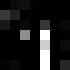

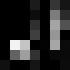

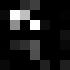

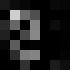

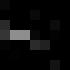

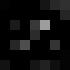

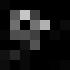

In [28]:
big = np.zeros((70,70))
for l in range(64):
    pq = np.zeros((7,7))
    #pq.shape
    for i in range(7):
        for j in range(7):
            pq[i][j] = p[i][j][l]
    big = magnify(pq, 7, 10)
    DisplayArray(big)
#big = big/64.0
#DisplayArray(big)